In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv("D:/UNIFIED/Economic Data Analysis-13/Cost_of_Living_Index_2022.csv")

In [41]:
df

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86
...,...,...,...,...,...,...,...,...
134,135,Venezuela,43.20,9.99,27.63,37.34,46.23,15.41
135,136,Vietnam,37.48,13.22,26.11,38.70,19.98,29.38
136,137,Yemen,53.14,6.71,31.38,67.12,24.74,14.41
137,138,Zambia,33.04,9.26,21.90,31.53,22.46,40.33


In [43]:
df.isnull().sum()

Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder

la_country = LabelEncoder()

df['Country'] = la_country.fit_transform(df['Country'])

In [47]:
df

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,0,20.37,2.72,12.09,14.92,12.41,23.04
1,2,1,35.50,8.47,22.83,29.32,25.82,30.19
2,3,2,26.87,4.59,16.43,28.82,14.48,24.63
3,4,3,34.69,7.71,22.04,28.17,33.32,30.72
4,5,4,33.89,11.61,23.45,27.59,30.55,28.86
...,...,...,...,...,...,...,...,...
134,135,134,43.20,9.99,27.63,37.34,46.23,15.41
135,136,135,37.48,13.22,26.11,38.70,19.98,29.38
136,137,136,53.14,6.71,31.38,67.12,24.74,14.41
137,138,137,33.04,9.26,21.90,31.53,22.46,40.33


In [53]:
X = df.drop(columns=['Rent Index','Rank'],axis=1)
y = df['Rent Index']

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score

In [63]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
model = RandomForestRegressor(n_estimators=100,random_state=42)


In [67]:
model.fit(Xtrain,ytrain)

RandomForestRegressor(random_state=42)

In [69]:
ypred = model.predict(Xtest)
ypred

array([10.4076,  5.5137, 16.2269, 25.3295,  9.519 ,  9.0684, 45.9309,
       13.9562,  5.6142,  9.7298,  8.7931, 35.1675,  9.7377,  8.6821,
       37.1612, 26.4981, 40.1375, 13.5623, 12.3865, 61.6832, 13.6016,
       14.1812, 10.4111, 10.0939, 39.8694,  5.1414, 14.2526, 14.6848])

In [71]:
mse = mean_squared_error(ytest,ypred)
mse

17.310034963571457

In [73]:
r2 = r2_score(ytest,ypred)
r2

0.9081929409798105

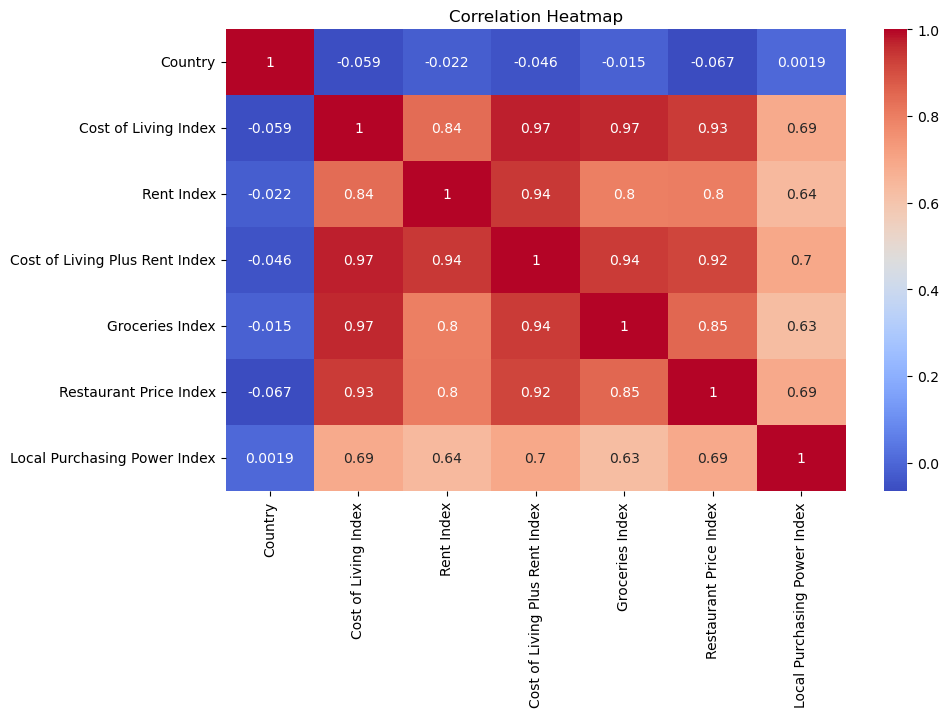

In [85]:
plt.figure(figsize=(10,6))
sns.heatmap(df.drop(columns=['Rank']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_24328\776161657.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Country", y="Cost of Living Index", data=top_col, palette="Reds_r")


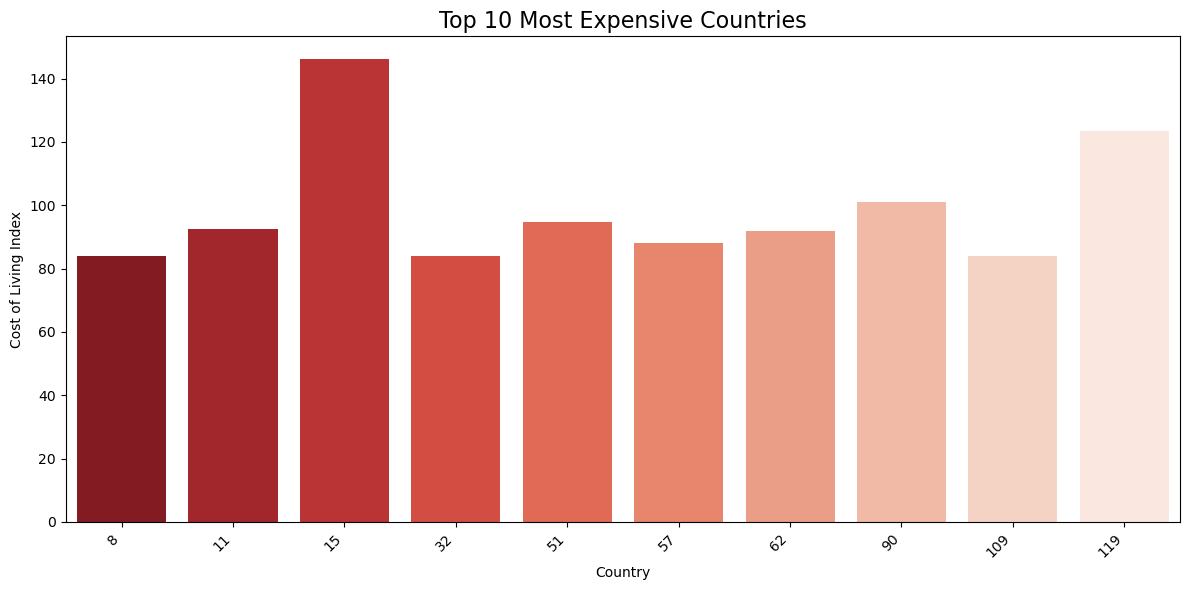

In [93]:
top_col = df.sort_values(by="Cost of Living Index", ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x="Country", y="Cost of Living Index", data=top_col, palette="Reds_r")
plt.title("Top 10 Most Expensive Countries", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()